## Topic  Modeling

### 1. Semantic Text Similarity (의미론적 텍스트 유사성)

* Applications of semantic similarity
  * Grouping similar words into semantic concepts
  * As a building block in natural language understanding tasks
    * Textual entailment
    * Paraphrasing 

* WordNet
  * Semantic dictionary of (mostly) English words, interlined by semantic relations
  * Includes rich linguistic information
    * part of speech, word senses, synonyms, hypernyms/hyponymns...
  * Machine-readable, freely available

* Semantic similarity using WordNet
  * WordNet organizes information in a hierarchy
  * Many similarity measures use the hierarchy in some way
  * Verbs, nouns, adjeectives all have separate hierarchies

*  Path Similarity
  * Find the shortest path between the two concepts
  * Similarity measure inversely related to path distance

* Lowest common subsumer(LCS)
  * Find the closest ancestor to both concepts

* Lin Similarity
  * Similarity measure based on the information contained in the LCS of the two concepts.
  * P(u) is given by the information content learnt over a large corpus.

* How to do it in Python?
  * WordNet easily imported into Python through NLTk
  * Find appropriate sense of the words.



In [ ]:
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

deer = wn.synset('deer.n.01')
elk = wn.synset('elk.n.01')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


* How to do it in Python? (2)
  * find path similarity
  * Use an information criteria to find Lin similarity

In [ ]:
deer.path_similarity(elk)
# deer.path_similarity(horse)

0.5

In [ ]:
from nltk.corpus import wordnet_ic
nltk.download('wordnet_ic')
brown_ic = wordnet_ic.ic('ic-brown.dat')

deer.lin_similarity(elk, brown_ic)
# deer.lin_similarity(horse, brown_ic)

[nltk_data] Downloading package wordnet_ic to /root/nltk_data...
[nltk_data]   Package wordnet_ic is already up-to-date!


0.8623778273893673

* Collocations and Distributional similarity
  * "You  know a word by the company it keeps" [Firth, 1957]
  * Two words that frequently appears in similar  contexts are more likely to be semantically related.
  
*  Distributional Similarity : Context
  * Words before, after, within a small window
  * Parts of speech of words before, after, in a small window
  * Specific syntactic  relation to the target word
  * Words in the same sentence , same documents..

*  Strength of association between words
  * How frequent are these?
  * Also important to see how frequent are individual words
    * 'the' is very frequent so high chances it co-occurs often with every otehr word
  * Pointwise Mutual Information

* How to do it in Python?
  * Use NLTK Collocations and Association measures
  * finder also has other useful functions, such as frequency filter


In [ ]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(text)
finder.nbest(bigram_measures.pmi, 10)

NameError: ignored

### 2. Topic Modeling

* What is Topic Modeling?
  * A coarse-level analysis of what's in a text collection
  * Topic : the subject(theme) of a discourse
  * Topics are represented as a word distribution
  * A document is a mixture of topics.

  * What's known :
    * The text collection or corpus
    * Number of topics
  * What's not known :
    * The actual topics
    * Topic distribution for each document
  * Essentially, text clustering problem
    * Documents and words clustered simultaneously

### 3. Generative  Models and LDA

* Generative Models for Text
1. Generation
  * Pr(text|model)
  * Imagine you have a chest with words and you pick words from this chest then create your document.
  * The document will be something about the words from the chest. 
  * In this generation process, you have a model that gives out words, and you use thouse words coming from that model to generate the document.

2. Inference, Estimation
  * You could start from the document and see how many times words occur. Then create a distribution of words, that is you create a probability distribution of how likely it is to see the words.


* Generative Models can be Complex
  * Instead of one topic, you have 4 topic models. The generation is almost like you decide which chest the word comes out of.
  * You still create the same document. Then, when you are using these documents to infer your models, you need to infer four models. 
  * You need to somehow infer what was the combination of words coming from these four chests, four topics.
  * Also what were the individual topic models, individual word distributions. 
  * Also this mixture model of how you use these topic models and combine them to create one document.
  * this is a **mixture model**.


* Latent Dirichlet Allocation (LDA)
  * Generative m odel for a document d
     * Choose length  of document d
     * Choose a mixture of topics for document d
     * Use a topic's multinomial distribution to output words to fill that topic's quota.

* Topic Modeling in Practice
  * How many topics?
    * Finding or even guessing the number of topics is hard.
  * Interpreting topics
    * Topics are just word distributions.
    * Making sense of words / generating labels is subjective.

* Topic Modeling : Summary
  * Great tool for exploratory text analysis
    * What are the documents (tweets, reviews, news articles) about?
  * May tools are available in Python

* Working with LDA in Python
  * Many  packages avaiable, such as gensim, lda
  * Before use any of these packages, you need to pre-process text
    * Tokenize, normalize (lowercase)
    * Stop word removal
    * Stemming
  * Convert tokenized documents to a document - term matrix
  * Build LDA models on the doc-term matrix
  ---






In [ ]:
# doc_set : set of pre-processed text documents
import gensim
from gensim import corpora, models
dictionary = corpora.Dictionary(doc_set)
corpus = [dictionary.doc2bow(doc) for doc in doc_set] # This creates the document term matrix
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 4, id2word = dictionary, passes = 50)
print(ldamodel.print_topics(num_topics=4, num_words=5))


* ldamodel can also be used to find topic distributions of documents.

### Take Home Concepts
  1. Topic modeling is an exploratory tool frequently used for text mining.
  2. Latent Dirichlet Allocation(LDA) is a generative model used extensively for modeling large text corpora.
  3. LDA can also be used as a feature selection technique for text classfication and other tasks.

### 4. Information Extraction

* Information is hidden in free-text
  * Most traditional trasactional information is structured
  * Abundance of unstructured, freeform text
  * Then, How to convert unstructured text to structured form?

* Information Extraction
  * goal : Identify and extract fields of interest from free text

* Fields of Interest
  * Named entities
    * [NEWS] People, Places, Dates, ...
    * [FINANCE] Money, Companies,..
    * [MEDICINE] Diseases, Drugs,...
  * Relations
    * What happened to who, when, where, ...

* Named Entity Recognition
  * Named entities : Noun phrases that are of specific type and refer to specific individuals, places, organizations,...
  * Named Entity Recognition : Techniques to identify all mentions of pre-defined named entities in text
    * Identify the mention / phrase : Boundary detection
    * Identify the type : Tagging / classfication
    


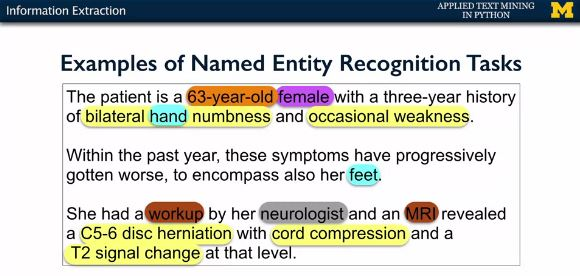

* Approaches to identify named entities
  * Depends on kinds of entities that need to be identified
  * For well-formatted fields like data, phone numbers: Regular expressions
  * For other fields : Typically a machine learning approach

* Person, Organization, Location/GPE
  * Standard NER task in NLP research community
  * Typically a four-class model
    1. PER
    2. ORG
    3. LOC/GPE
    4. Other/Outside(any other class)

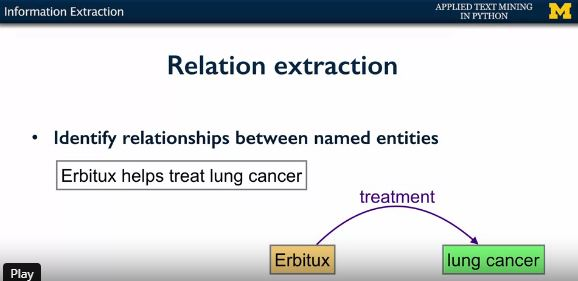

* Co-reference resolution
  * Disambiguate mentions and group mentions together
* Question Answering
  * Given a question, find the most appropriage answer from the text
    * What does Erbitux treat?
    * Who gave Anita the rose?
  * Builds on named entity recognition, relation extraction, and co-reference resolution

#### Take Home Concepts
1. Information Extraction is important for natural  language understanding and making sense of textual data
2. Named Entity Recognition is a key building block to address many advanced NLP tasks
3. Named Entity Recognition systems extensively deploy supervised machine learning and text might techniques discussed in this course.

#### Aditional Resources & Readings
1. [The primary reference for the LDA](http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf)
2. [Latent Dirichlet Allocation](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation)
3. [Description of the plate notation](https://en.wikipedia.org/wiki/Plate_notation)
4. [WordNet based similarity measures in NLTK](http://www.nltk.org/howto/wordnet.html)

